In [75]:
`import astropy.units as u
import astropy.wcs
import h5py
import matplotlib.pyplot as plt
import ndcube
from ndcube import NDCube
import numpy as np
#from synthesizAR.analysis import make_slope_map
from synthesizAR.instruments.util import extend_celestial_wcs
import warnings
import numpy as np
import sunpy
from sunpy.map import Map
from astropy.io import fits 
import glob
import os

Text(0, 0.5, 'alpha')

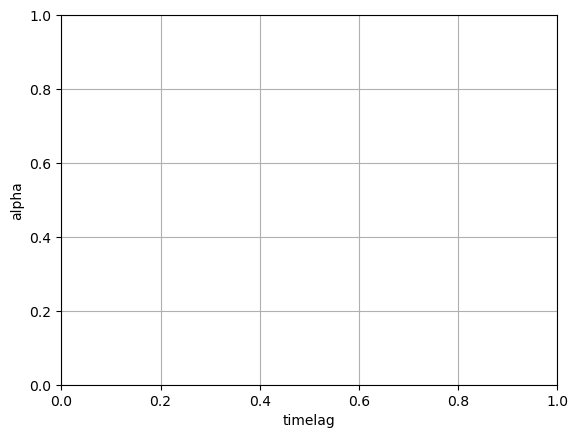

In [76]:
# scatter plot skeleton

plt.grid()
plt.xlabel('timelag')
plt.ylabel('alpha')
#figure(figsize = (width, height))
#plt.scatter(x,y)


In [119]:
#input maps and rsquared values to make a mask
high_em = sunpy.map.Map('/Users/avathienel/NASA/synthetic-observables-paper-models/paper/data/high_frequency/high_slope_map.fits')
#print(high_em.data)

high_r = sunpy.map.Map('/Users/avathienel/NASA/synthetic-observables-paper-models/paper/data/high_frequency/high_r_squared_map.fits')
#print(high_r.data)

high_em.mask = high_r.data < 0.75

inter_em = sunpy.map.Map('/Users/avathienel/NASA/synthetic-observables-paper-models/paper/data/intermediate_frequency/intermediate_slope_map.fits')
#print(inter_em.data)

inter_r = sunpy.map.Map('/Users/avathienel/NASA/synthetic-observables-paper-models/paper/data/intermediate_frequency/intermediate_r_squared_map.fits')
#print(inter_r.data)

inter_em.mask = inter_r.data < 0.75 

low_em = sunpy.map.Map('/Users/avathienel/NASA/synthetic-observables-paper-models/paper/data/low_frequency/low_slope_map.fits')
#print(low_em.data)

low_r = sunpy.map.Map('/Users/avathienel/NASA/synthetic-observables-paper-models/paper/data/low_frequency/low_r_squared_map.fits')
#print(low_r.data)

low_em.mask = low_r.data < 0.75 

In [104]:
with fits.open('/Users/avathienel/NASA/synthetic-observables-paper-models/paper/data/high_frequency/timelag_171_131.fits') as hdul:
    data = hdul[0].data
    header = hdul[0].header

In [77]:
from astropy.io import fits
from sunpy.map import Map

# Open the FITS file and get data and header
filepath4 = '/Users/avathienel/NASA/synthetic-observables-paper-models/paper/data/intermediate_frequency/intermediate_slope_map.fits'
hdulist4 = fits.open(filepath4)
data4 = hdulist4[0].data  # Assuming the data is in the primary HDU
header4 = hdulist4[0].header
print(header4)
# why did this work?
header4['cunit1'] = 'arcsec'
header4['cunit2'] = 'arcsec'

# Create a SunPy map using the updated data and header
inter_slope_map = Map(data4, header4)
inter_slope_map

# Open the FITS file and get data and header
filepath3 = '/Users/avathienel/NASA/synthetic-observables-paper-models/paper/data/intermediate_frequency/intermediate_r_squared_map.fits'
hdulist3 = fits.open(filepath3)
data3 = hdulist3[0].data  # Assuming the data is in the primary HDU
header3 = hdulist3[0].header
print(header3)
# why did this work?
header3['cunit1'] = 'arcsec'
header3['cunit2'] = 'arcsec'

# Create a SunPy map using the updated data and header
inter_r = Map(data3, header3)
inter_r

inter_slope_map.mask = inter_r.data < 0.75 
inter_masked_slope = inter_slope_map
inter_masked_slope.data

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  543                                                  NAXIS2  =                  519                                                  EXTEND  =                    T                                                  END                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype='>f8')

In [92]:
#practicing scatter plot
plt.grid()
plt.xlabel('timelag')
plt.ylabel('alpha')
plt.figure(figsize = (low_masked_slope.data, low_masked_slope.data))
plt.scatter(x,y)

In [120]:
test_corr = sunpy.map.Map('/Users/avathienel/NASA/synthetic-observables-paper-models/paper/data/high_frequency/correlation_211_171.fits')
#print(test_corr.data)

test_lag = sunpy.map.Map('/Users/avathienel/NASA/synthetic-observables-paper-models/paper/data/high_frequency/timelag_211_171.fits')
#print(test_lag.data)

#plt.hist(slope_map.data[~slope_map.mask])
test_lag.mask = test_corr.data < 0.1 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[-19990. -19990. -19990. ... -19990. -19990. -19990.]
 [-19990. -19990. -19990. ... -19990. -19990. -19990.]
 [-19990. -19990. -19990. ... -19990. -19990. -19990.]
 ...
 [-19990. -19990. -19990. ... -19990. -19990. -19990.]
 [-19990. -19990. -19990. ... -19990. -19990. -19990.]
 [-19990. -19990. -19990. ... -19990. -19990. -19990.]]


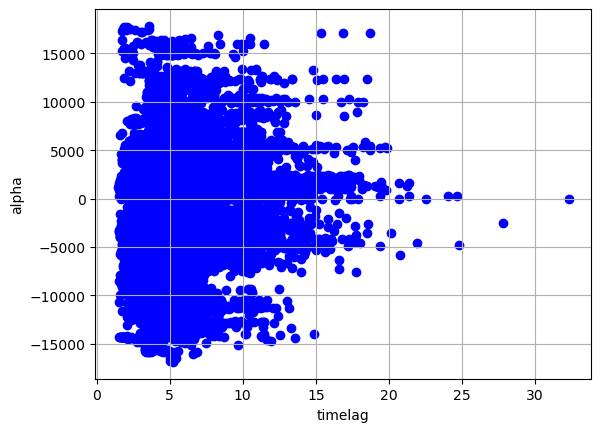

In [135]:
# Flatten the arrays to create lists of x and y coordinates
x_coords = high_em.data[~combined_mask] #flatten()
y_coords = test_lag.data[~combined_mask] #flatten()

#high_em_masked = np.where(combined_mask, high_em, np.nan)
plt.grid()
plt.xlabel('timelag')
plt.ylabel('alpha')
#figure(figsize = (width, height))
#plt.scatter(x,y)
#plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords, marker='o', color='b')
#print(high_masked_lag.data.flat)

In [41]:
inter_slope_map = sunpy.map.Map('/Users/avathienel/NASA/synthetic-observables-paper-models/paper/data/intermediate_frequency/intermediate_slope_map.fits')
low_slope_map = sunpy.map.Map('/Users/avathienel/NASA/synthetic-observables-paper-models/paper/data/high_frequency/low_slope_map.fits')
high_r = sunpy.map.Map('/Users/avathienel/NASA/synthetic-observables-paper-models/paper/data/high_frequency/high_r_squared_map.fits')
inter_r = sunpy.map.Map('/Users/avathienel/NASA/synthetic-observables-paper-models/paper/data/high_frequency/intermediate_r_squared_map.fits')
low_r = sunpy.map.Map('/Users/avathienel/NASA/synthetic-observables-paper-models/paper/data/high_frequency/low_r_squared_map.fits')

MapMetaValidationError: Image coordinate units for axis 1 not present in metadata.
Image coordinate units for axis 2 not present in metadata.
See https://docs.sunpy.org/en/stable/how_to/fix_map_metadata.html for instructions on how to add missing metadata.